In [1]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as dset
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Set up GPU device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

Generator and Discriminator loss during training:GAN


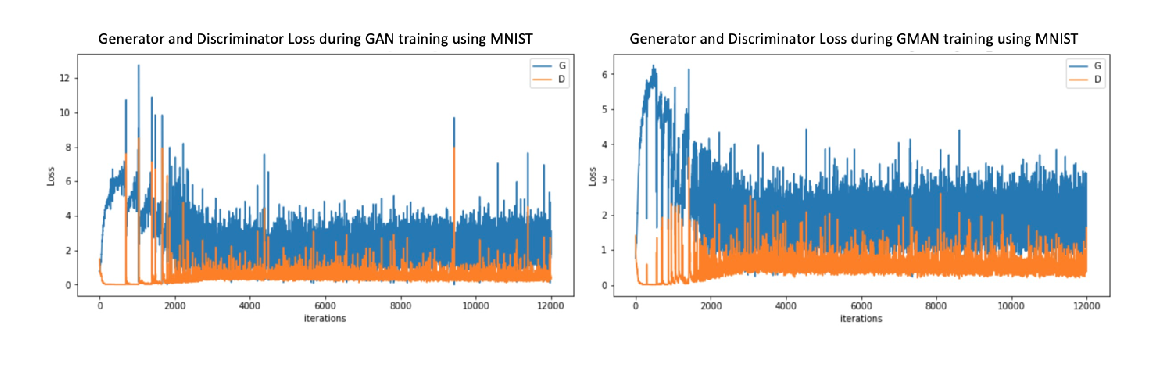

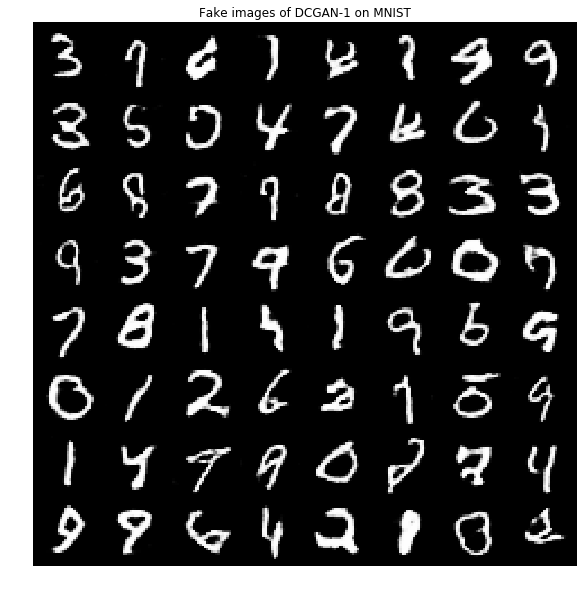

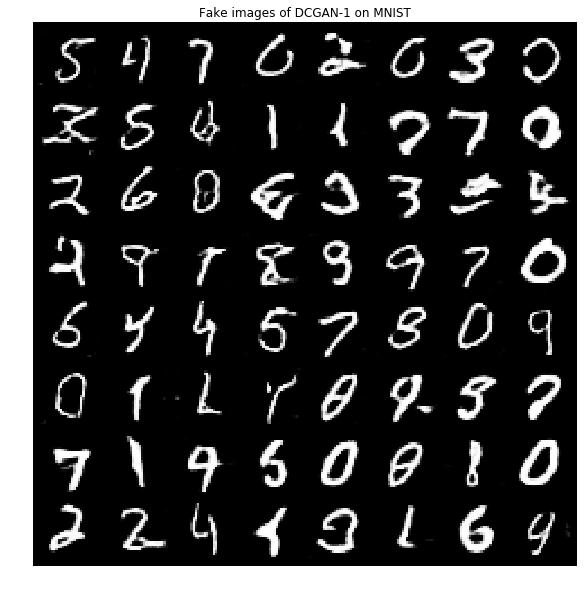

In [2]:
# Deep Convolutional GAN-1 on MNIST

class GeneratorDC1MNIST(nn.Module):

    def __init__(self):
        super().__init__()
        #ConvTranspose2d(input_channels,output_channels,kernel_size,stride,padding_value)
        #BatchNorm2d: Applies Batch Normalization over a 4d input that is seen as a mini-batch of 3d inputs
        
        self.deconv1 = nn.ConvTranspose2d(100, 128, 4, 1, 0)
        self.deconv1_bn = nn.BatchNorm2d(128)
        self.deconv2 = nn.ConvTranspose2d(128, 64, 4)
        self.deconv2_bn = nn.BatchNorm2d(64)
        self.deconv3 = nn.ConvTranspose2d(64, 32, 4, 2, 1)
        self.deconv3_bn = nn.BatchNorm2d(32)
        self.deconv4 = nn.ConvTranspose2d(32, 1, 4, 2, 1)

    #Weights initialized from a zero-centered normal distribution with standard deviation 0.02
    def weight_init(self, mean, std):
        for m in self._modules:
            normal_init(self._modules[m], mean, std)

    # forward method
    def forward(self, x):
        x = F.relu(self.deconv1_bn(self.deconv1(x)))
        x = F.relu(self.deconv2_bn(self.deconv2(x)))
        x = F.relu(self.deconv3_bn(self.deconv3(x)))
        x = F.tanh(self.deconv4(x))

        return x

prefix = 'DC1_MNIST_'
imgListGAN = []
imgListGMAN = []

netG = GeneratorDC1MNIST()
netG.load_state_dict(torch.load('./models/'+prefix+'netG.pt'))
netG.eval()
netG.to(device)

MnetG = GeneratorDC1MNIST()
MnetG.load_state_dict(torch.load('./models/'+prefix+'MnetG.pt'))
MnetG.eval()
MnetG.to(device)
fixedNoise = torch.randn(64, 100,device=device).view(-1, 100, 1, 1)

fake_gan = netG(fixedNoise).detach().cpu()
imgListGAN.append(vutils.make_grid(fake_gan, padding=2, normalize=True))
fake_gman = MnetG(fixedNoise).detach().cpu()
imgListGMAN.append(vutils.make_grid(fake_gman, padding=2, normalize=True))

plt.figure(figsize=(20, 10))
img = plt.imread('./images/'+prefix+'LOSS.png')
plt.axis('off')
plt.imshow(img)
print("Generator and Discriminator loss during training:GAN")

plt.figure(figsize=(10, 10))
plt.axis('off')
plt.title('Fake images of DCGAN-1 on MNIST')
plt.imshow(np.transpose(imgListGAN[-1],(1,2,0)))
plt.show()


plt.figure(figsize=(10, 10))
plt.axis('off')
plt.title('Fake images of DCGAN-1 on MNIST')
plt.imshow(np.transpose(imgListGMAN[-1],(1,2,0)))
plt.show()


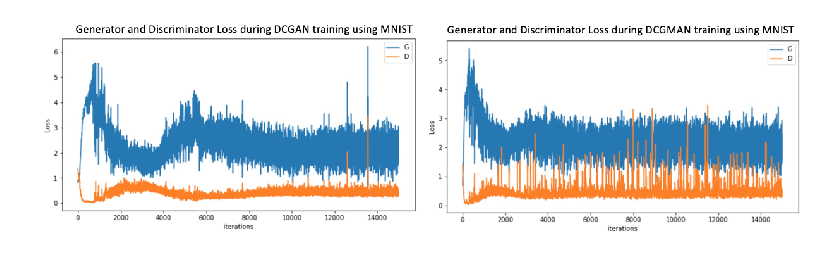

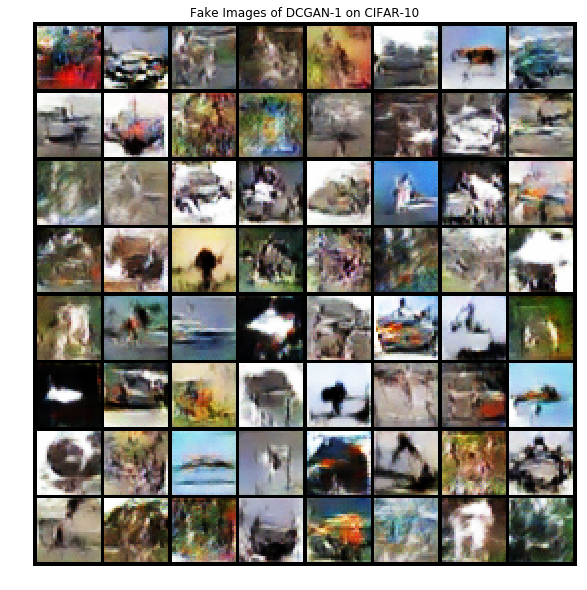

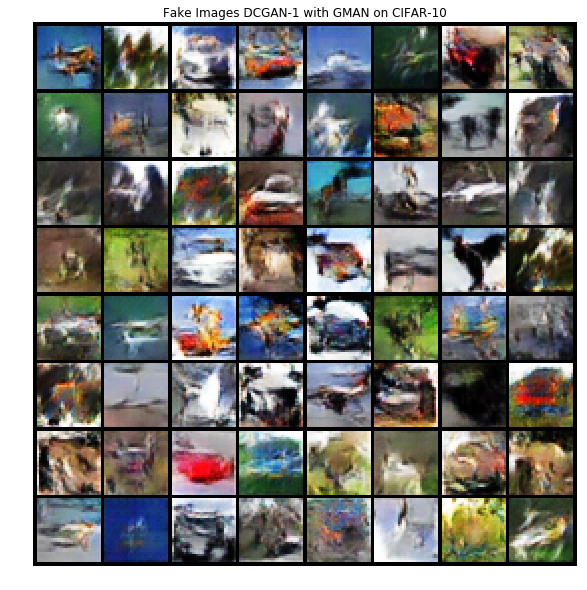

In [3]:
# Deep Convolutional GAN-1 on CIFAR-10

class GeneratorDC1CIFAR(nn.Module):

    def __init__(self):
        super().__init__()
        #ConvTranspose2d(input_channels,output_channels,kernel_size,stride,padding_value)
        #BatchNorm2d: Applies Batch Normalization over a 4d input that is seen as a mini-batch of 3d inputs
        
        self.deconv1 = nn.ConvTranspose2d(100, 128, 4, 1, 0)
        self.deconv1_bn = nn.BatchNorm2d(128)
        self.deconv2 = nn.ConvTranspose2d(128, 64, 4, 2, 1)
        self.deconv2_bn = nn.BatchNorm2d(64)
        self.deconv3 = nn.ConvTranspose2d(64, 32, 4, 2, 1)
        self.deconv3_bn = nn.BatchNorm2d(32)
        self.deconv4 = nn.ConvTranspose2d(32, 3, 4, 2, 1)

    #Weights initialized from a zero-centered normal distribution with standard deviation 0.02
    def weight_init(self, mean, std):
        for m in self._modules:
            normal_init(self._modules[m], mean, std)

    # forward method
    def forward(self, x):
        x = F.relu(self.deconv1_bn(self.deconv1(x)))
        x = F.relu(self.deconv2_bn(self.deconv2(x)))
        x = F.relu(self.deconv3_bn(self.deconv3(x)))
        x = F.tanh(self.deconv4(x))

        return x

prefix = 'DC1_CIFAR_'
imgListGAN = []
imgListGMAN = []

netG = GeneratorDC1CIFAR()
netG.load_state_dict(torch.load('./models/'+prefix+'netG.pt'))
netG.eval()
netG.to(device)

MnetG = GeneratorDC1CIFAR()
MnetG.load_state_dict(torch.load('./models/'+prefix+'MnetG.pt'))
MnetG.eval()
MnetG.to(device)

fake_gan = netG(fixedNoise).detach().cpu()
imgListGAN.append(vutils.make_grid(fake_gan, padding=2, normalize=True))
fake_gman = MnetG(fixedNoise).detach().cpu()
imgListGMAN.append(vutils.make_grid(fake_gman, padding=2, normalize=True))

plt.figure(figsize=(14, 7))
img = plt.imread('./images/'+prefix+'LOSS.png')
plt.axis('off')
plt.imshow(img)


plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Fake Images of DCGAN-1 on CIFAR-10')
plt.imshow(np.transpose(imgListGAN[-1], (1,2,0)))
plt.show()

plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Fake Images DCGAN-1 with GMAN on CIFAR-10')
plt.imshow(np.transpose(imgListGMAN[-1], (1,2,0)))
plt.show()


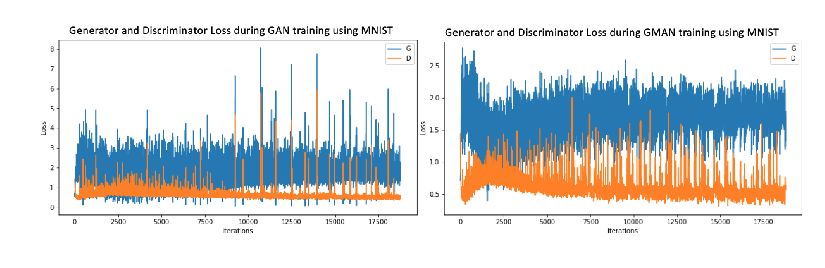

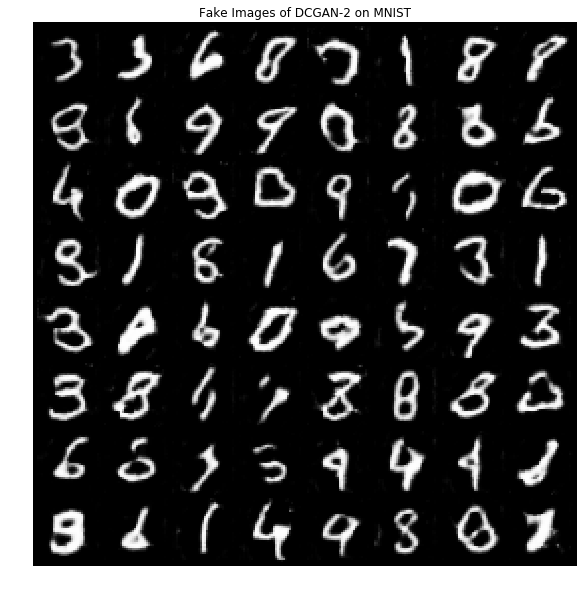

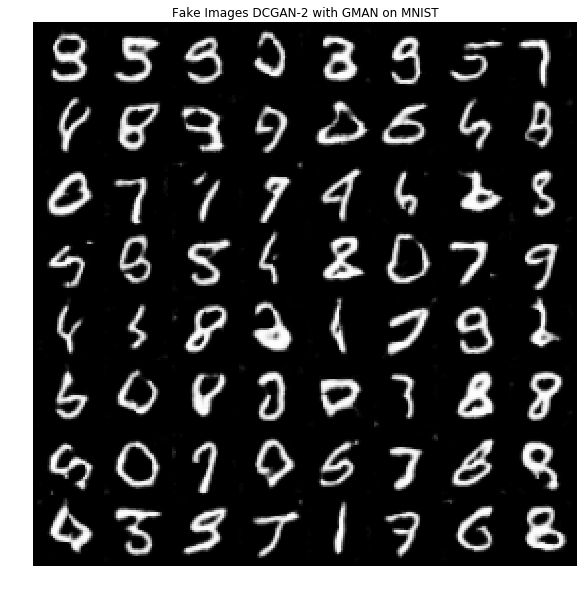

In [4]:
# Deep Convolutional GAN-2 on MNIST

class GeneratorDC2MNIST(nn.Module):
    """Build a Generative Network."""
    
    def __init__(self):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(100, 16*8*4*4),
            nn.BatchNorm1d(16*8*4*4),
            nn.ReLU(inplace=True))
        
        self.main = nn.Sequential(          
            nn.ConvTranspose2d(16*8, 16*4, 4, 2, 1),
            nn.BatchNorm2d(16*4),
            nn.ReLU(inplace=True),
            
            nn.ConvTranspose2d(16*4, 16*2, 4, 2, 1),
            nn.BatchNorm2d(16*2),
            nn.ReLU(inplace=True),
        
            nn.ConvTranspose2d(16*2, 1, 4, 2, 1),
            nn.Tanh())
    
    def forward(self, z):
        x = self.fc(z)
        x = x.view(-1, 16*8, 4, 4)
        x = self.main(x)
        return x

prefix = 'DC2_MNIST_'
imgListGAN = []
imgListGMAN = []

netG = GeneratorDC2MNIST()
netG.load_state_dict(torch.load('./models/'+prefix+'netG.pt'))
netG.eval()
netG.to(device)

MnetG = GeneratorDC2MNIST()
MnetG.load_state_dict(torch.load('./models/'+prefix+'MnetG.pt'))
MnetG.eval()
MnetG.to(device)

fixedNoise = torch.randn(64, 100, device=device)
fake_gan = netG(fixedNoise).detach().cpu()
imgListGAN.append(vutils.make_grid(fake_gan, padding=2, normalize=True))
fake_gman = MnetG(fixedNoise).detach().cpu()
imgListGMAN.append(vutils.make_grid(fake_gman, padding=2, normalize=True))

plt.figure(figsize=(14, 7))
img = plt.imread('./images/'+prefix+'LOSS.png')
plt.axis('off')
plt.imshow(img)


plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Fake Images of DCGAN-2 on MNIST')
plt.imshow(np.transpose(imgListGAN[-1], (1,2,0)))
plt.show()

plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Fake Images DCGAN-2 with GMAN on MNIST')
plt.imshow(np.transpose(imgListGMAN[-1], (1,2,0)))
plt.show()


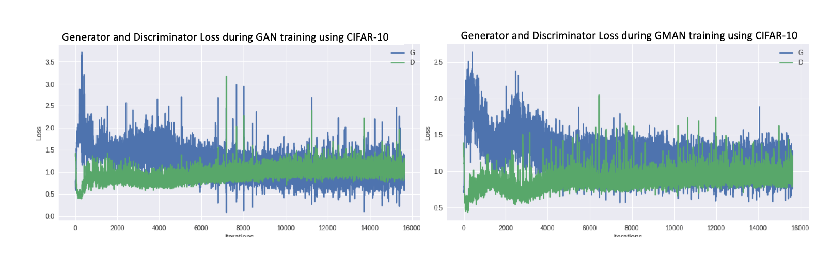

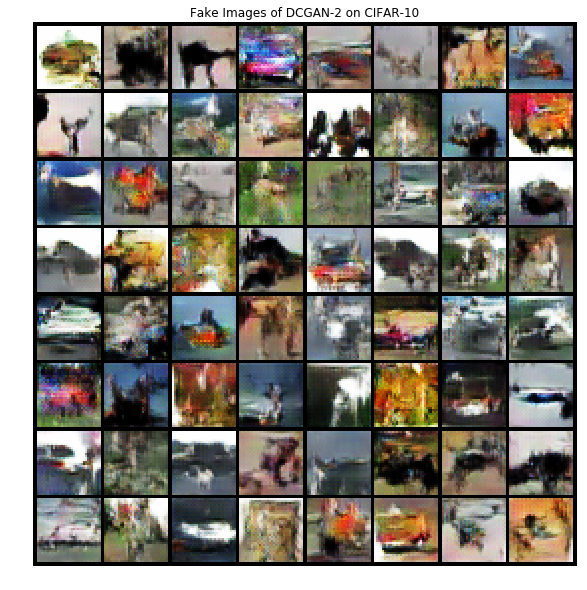

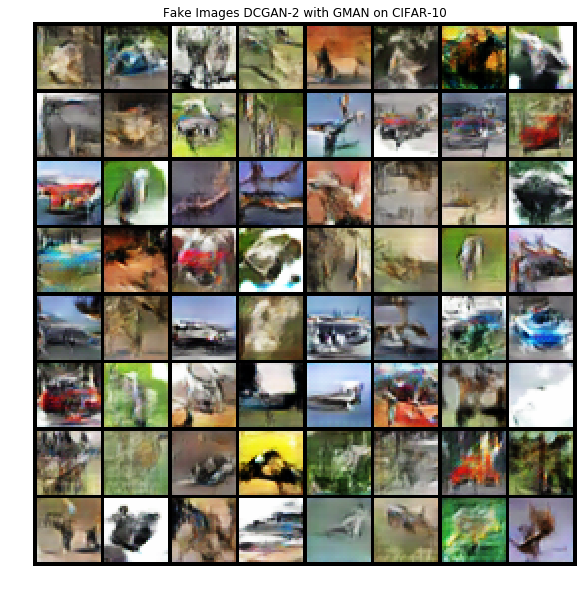

In [5]:
# Deep Convolutional GAN-2 on CIFAR-10

class GeneratorDC2CIFAR(nn.Module):
    """Build a Generative Network."""
    
    def __init__(self):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(100, 16*8*4*4),
            nn.BatchNorm1d(16*8*4*4),
            nn.ReLU(inplace=True))
        
        self.main = nn.Sequential(          
            nn.ConvTranspose2d(16*8, 16*4, 4, 2, 1),
            nn.BatchNorm2d(16*4),
            nn.ReLU(inplace=True),
            
            nn.ConvTranspose2d(16*4, 16*2, 4, 2, 1),
            nn.BatchNorm2d(16*2),
            nn.ReLU(inplace=True),
        
            nn.ConvTranspose2d(16*2, 3, 4, 2, 1),
            nn.Tanh())
    
    def forward(self, z):
        x = self.fc(z)
        x = x.view(-1, 16*8, 4, 4)
        x = self.main(x)
        return x

prefix = 'DC2_CIFAR_'
imgListGAN = []
imgListGMAN = []

netG = GeneratorDC2CIFAR()
netG.load_state_dict(torch.load('./models/'+prefix+'netG.pt'))
netG.eval()
netG.to(device)

MnetG = GeneratorDC2CIFAR()
MnetG.load_state_dict(torch.load('./models/'+prefix+'MnetG.pt'))
MnetG.eval()
MnetG.to(device)

fixedNoise = torch.randn(64, 100, device=device)
fake_gan = netG(fixedNoise).detach().cpu()
imgListGAN.append(vutils.make_grid(fake_gan, padding=2, normalize=True))
fake_gman = MnetG(fixedNoise).detach().cpu()
imgListGMAN.append(vutils.make_grid(fake_gman, padding=2, normalize=True))

plt.figure(figsize=(14, 7))
img = plt.imread('./images/'+prefix+'LOSS.png')
plt.axis('off')
plt.imshow(img)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Fake Images of DCGAN-2 on CIFAR-10')
plt.imshow(np.transpose(imgListGAN[-1], (1,2,0)))
plt.show()

plt.figure(figsize=(10,10))
plt.axis('off')
plt.title('Fake Images DCGAN-2 with GMAN on CIFAR-10')
plt.imshow(np.transpose(imgListGMAN[-1], (1,2,0)))
plt.show()